In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [2]:
teams = ['BKN', 'MIL', 'GSW', 'LAL', 'IND', 'CHA', 'CHI', 'DET',
          'WAS', 'TOR', 'BOS', 'NYK', 'CLE', 'MEM', 'PHI', 'NOP',
          'HOU','MIN', 'ORL', 'SAS', 'OKC', 'UTA', 'SAC', 'POR',
          'DEN', 'PHX', 'DAL', 'ATL', 'MIA', 'LAC']

In [3]:
def print_params(params):
    M_, N_, E_, R_ = params['M'], params['N'], params['E'], params['R']

    print(f'M = {np.round(M_, 2)}')
    print(f'N = {np.round(N_, 2)}')
    print(f'E = {np.round(E_, 2)}')
    for p in R_:
        print(f'R[{p}] = {np.round(R_[p], 2)}')

In [4]:
profiles = dict()
for team in teams:
    try:
        with open(f'./results2/{team}_profile.pkl', 'rb') as file:
            profiles[team] = pickle.load(file)
    except:
        print(f'Team {team} has no profile')
        

In [9]:
for team in teams:
    print(f'=== {team} profile ===')
    if team in profiles:
        print_params(profiles[team])
    else:
        print(f'No data for {team}')

=== BKN profile ===
M = [[0.  0.  1. ]
 [0.  1.  0. ]
 [0.4 0.6 0. ]]
N = [[0.   0.49 0.51]
 [0.03 0.9  0.07]
 [0.   0.59 0.41]]
E = [[0.93 0.   0.07]
 [0.01 0.96 0.03]
 [0.62 0.   0.38]]
R[Spencer Dinwiddie] = [0.  0.5 0.  0.  0.5 0. ]
R[Cam Thomas] = [0.61 0.   0.3  0.1  0.   0.  ]
R[Mikal Bridges] = [0.   0.11 0.   0.78 0.11 0.  ]
R[Dorian Finney-Smith] = [0.  0.5 0.  0.  0.5 0. ]
R[Nic Claxton] = [0.4  0.   0.05 0.   0.31 0.23]
=== MIL profile ===
M = [[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]
N = [[0.02 0.96 0.02]
 [0.02 0.96 0.02]
 [0.17 0.83 0.  ]]
E = [[0.84 0.   0.16]
 [0.18 0.54 0.27]
 [0.08 0.01 0.91]]
R[Jrue Holiday] = [0.97 0.03 0.   0.01 0.   0.  ]
R[Grayson Allen] = [0.97 0.   0.02 0.   0.   0.  ]
R[Khris Middleton] = [0.95 0.05 0.   0.   0.   0.  ]
R[Giannis Antetokounmpo] = [0.87 0.   0.   0.02 0.12 0.  ]
R[Bobby Portis] = [0.87 0.1  0.   0.   0.   0.03]
=== GSW profile ===
M = [[0.   0.   1.  ]
 [0.02 0.98 0.  ]
 [1.   0.   0.  ]]
N = [[0.   0.82 0.18]
 [0.   1.   0.  ]
 [0

In [6]:
def extract_first_capital(input_string):
    words = input_string.split()
    first_word = words[0][0]  # First letter of the first word
    rest_of_words = ''.join(word for word in words[1:])  # Join the rest of the words
    return first_word + '. ' + rest_of_words

In [10]:
def heatmap(R, team):
    R_2d = np.vstack([R[p] for p in R])
    plt.imshow(R_2d, cmap='plasma', interpolation='nearest', vmin=0, vmax=1)
    plt.xlabel('Players')
    plt.ylabel('Players')
    plt.colorbar()
    ticks = [extract_first_capital(k) for k in R]
    plt.yticks(range(5), ticks)
    plt.xticks(range(6), ['r_i']+ticks, rotation=45)
    plt.savefig(f'./plots/{team}_heatmap.pdf', format='pdf', bbox_inches='tight')
    plt.show()

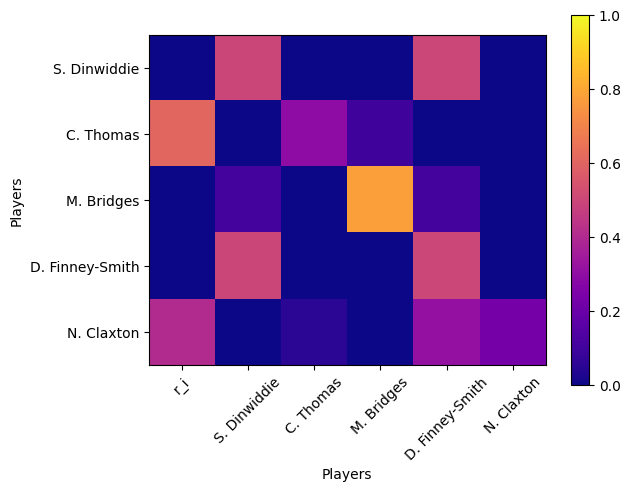

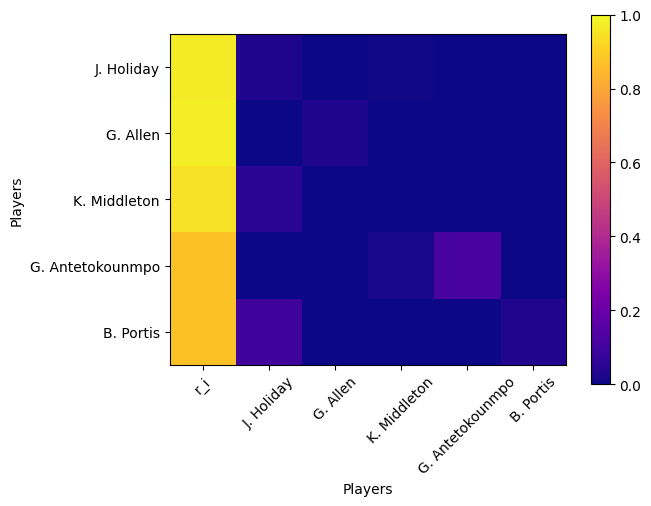

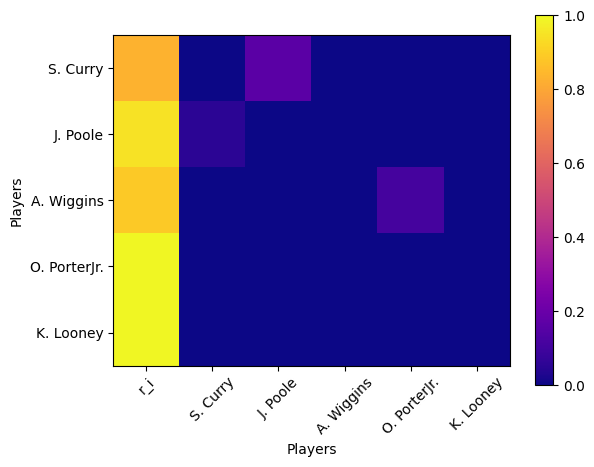

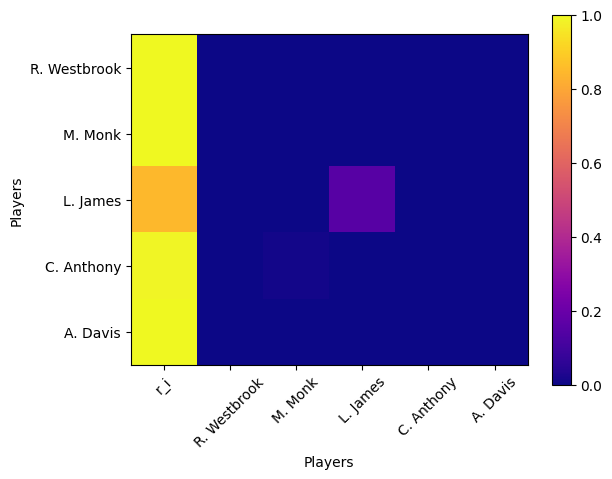

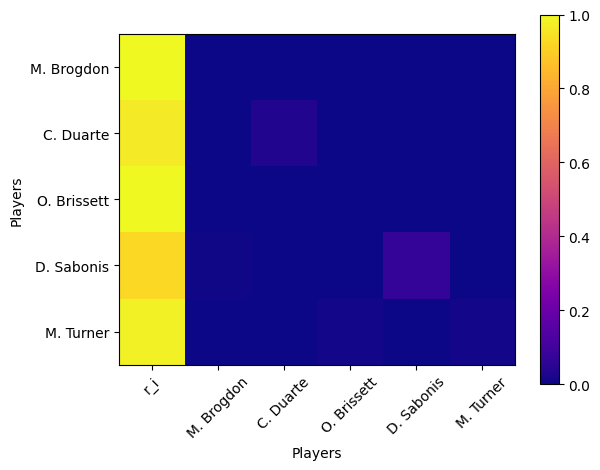

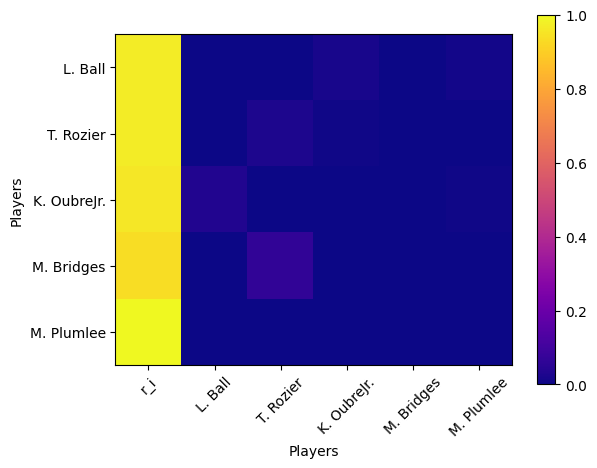

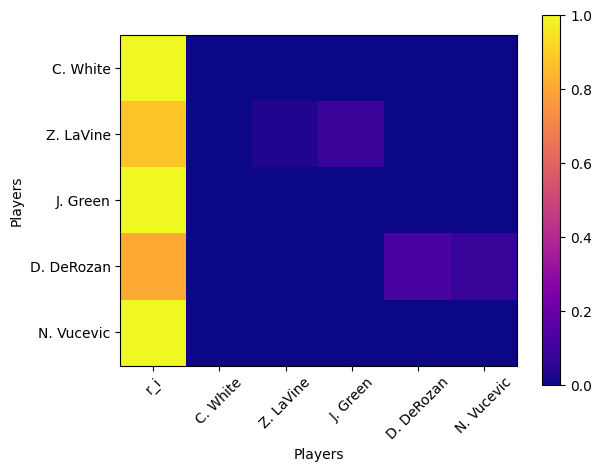

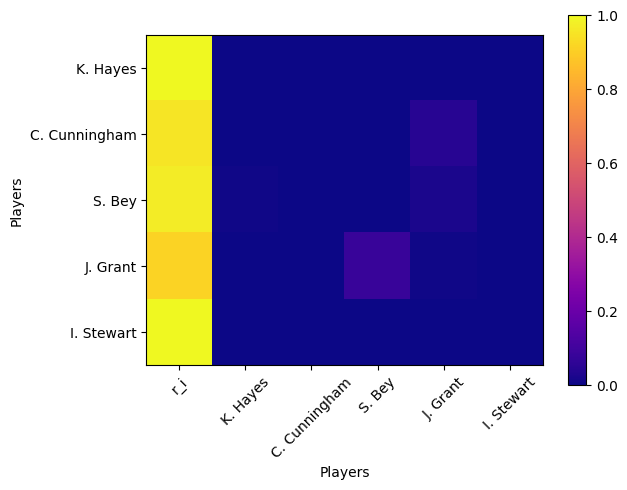

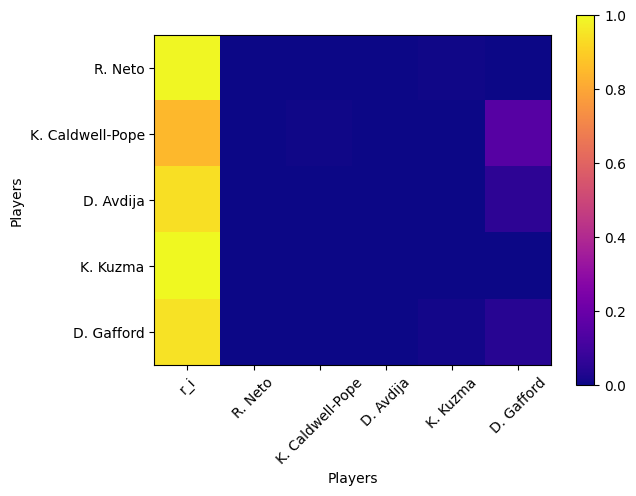

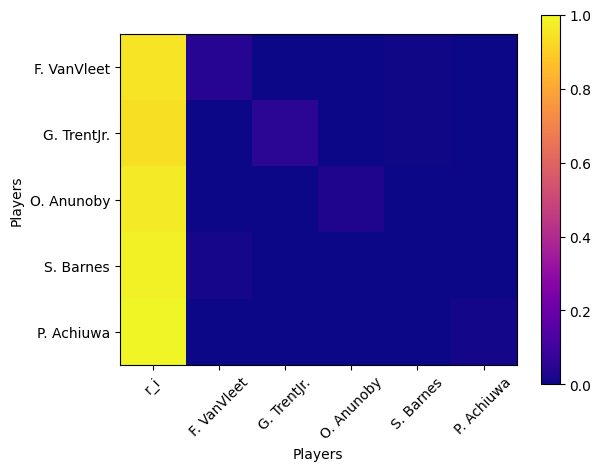

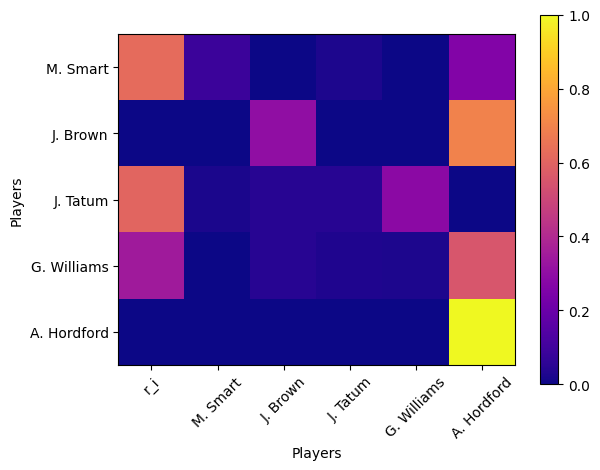

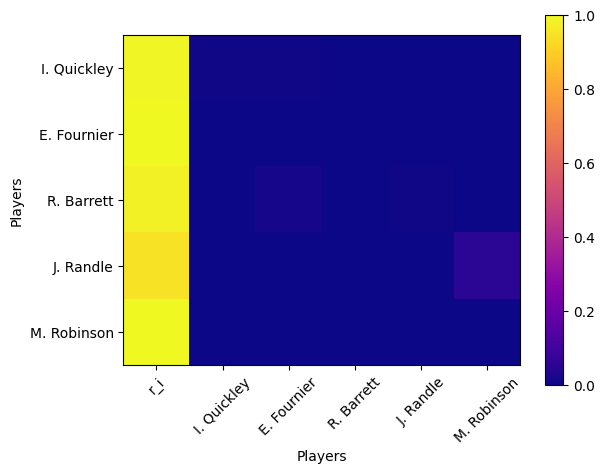

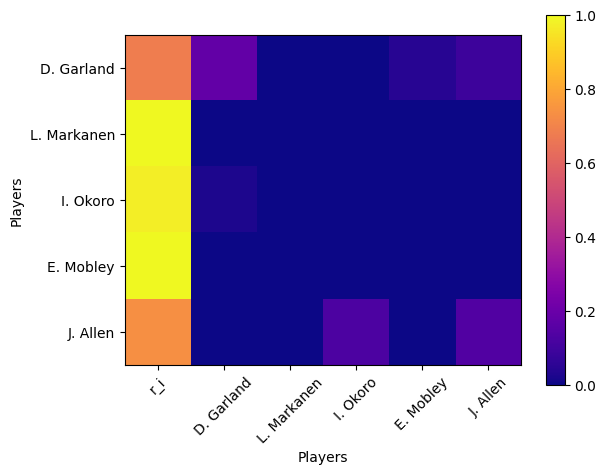

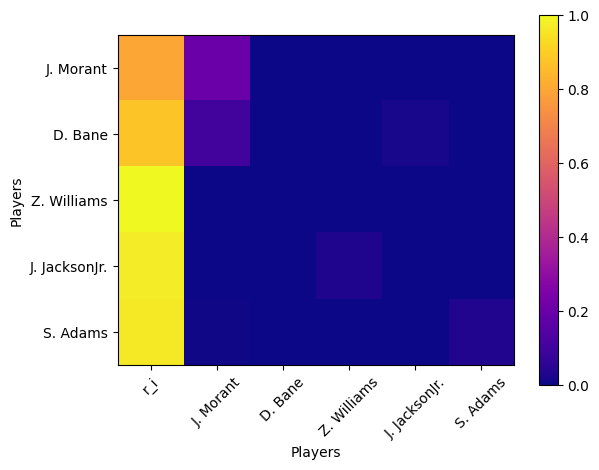

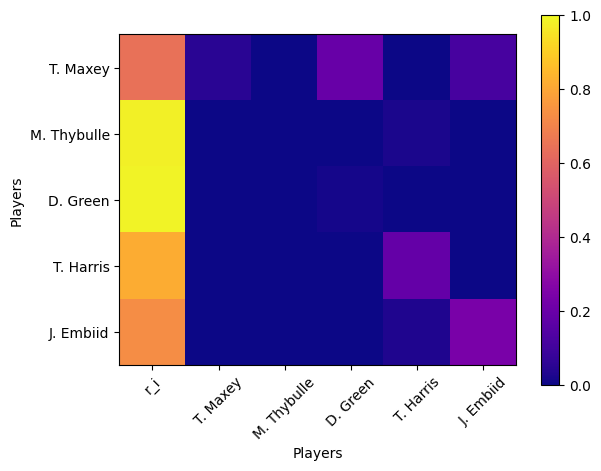

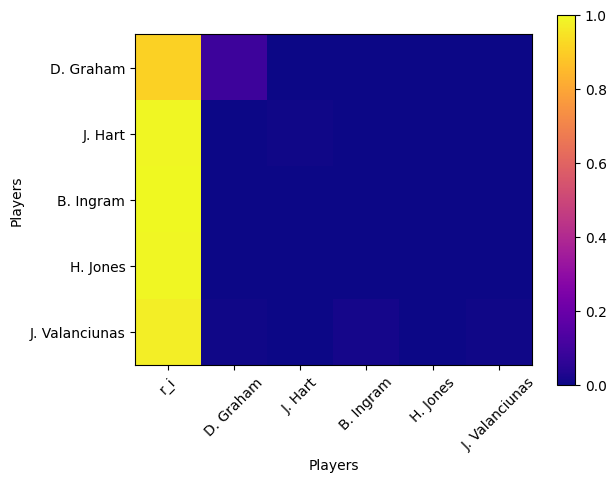

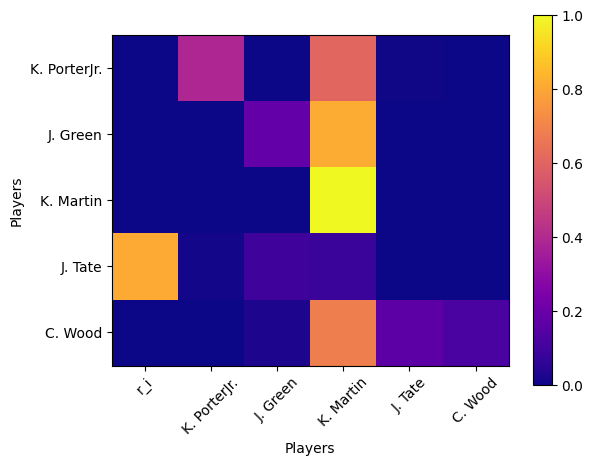

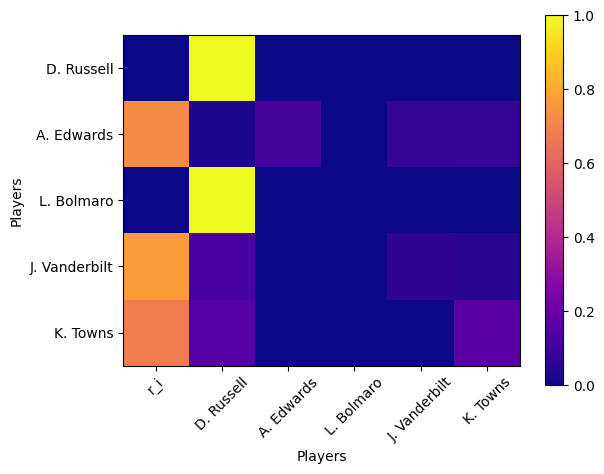

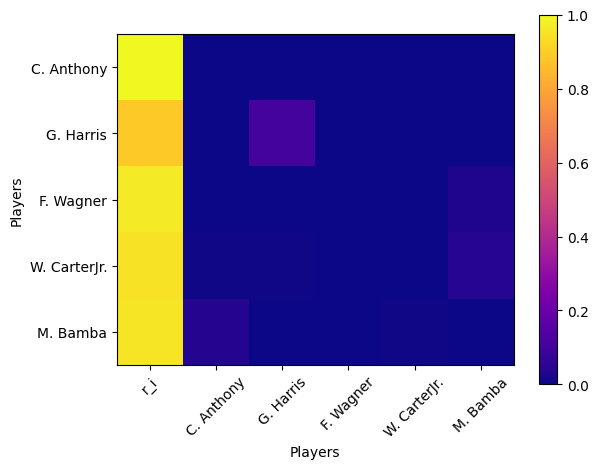

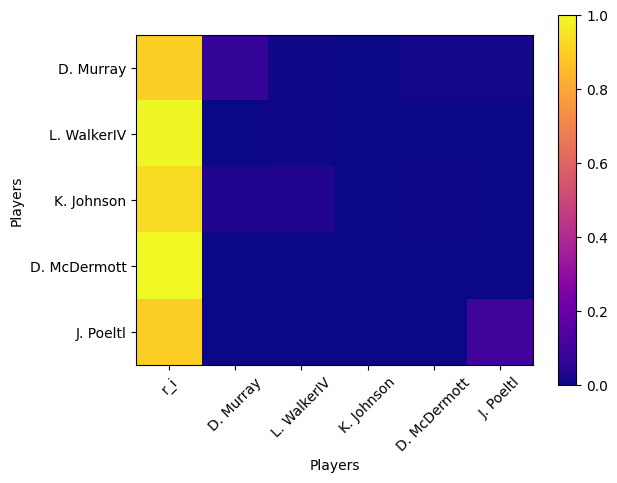

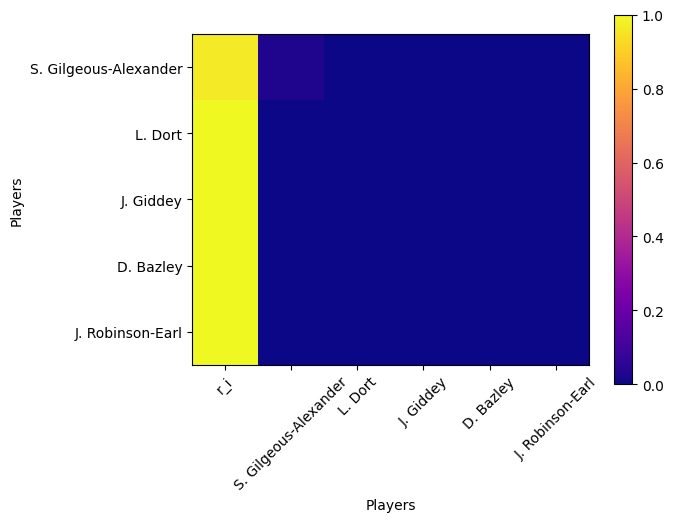

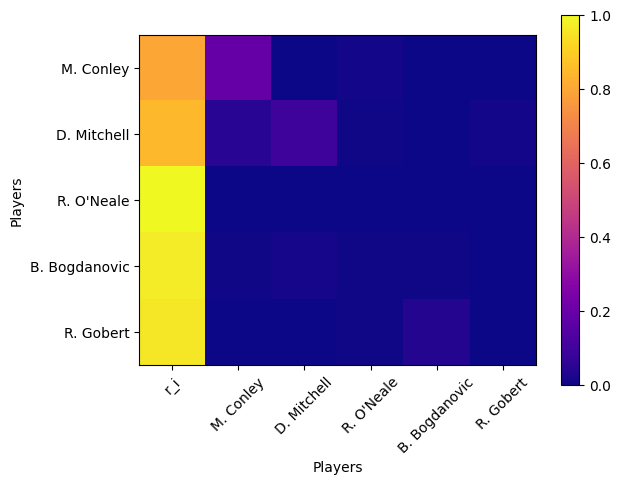

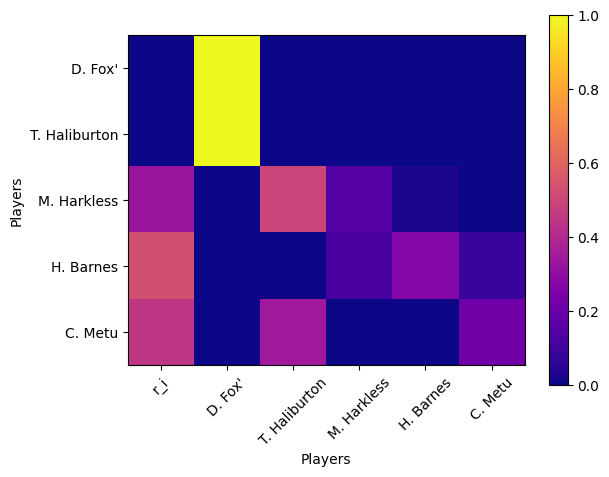

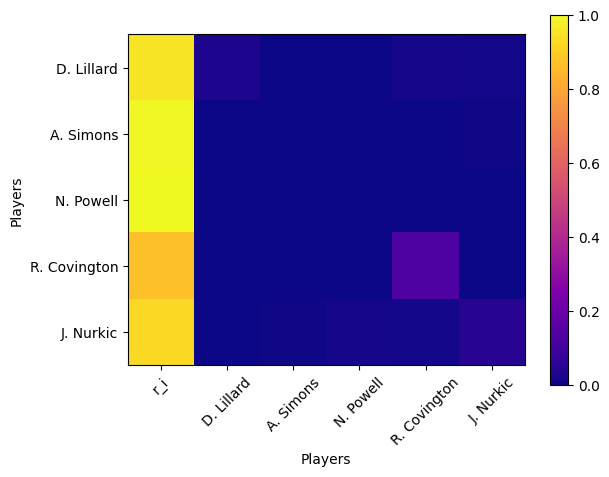

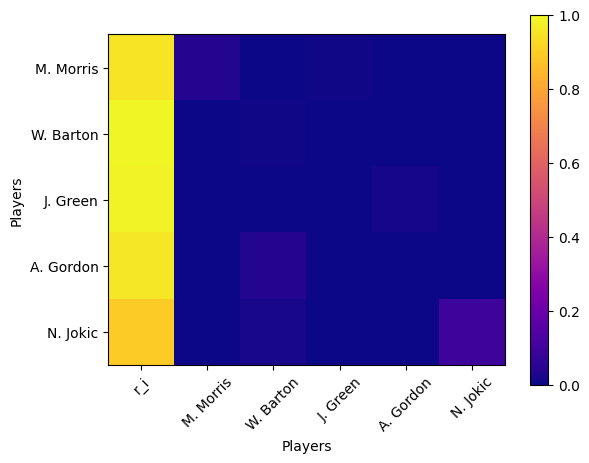

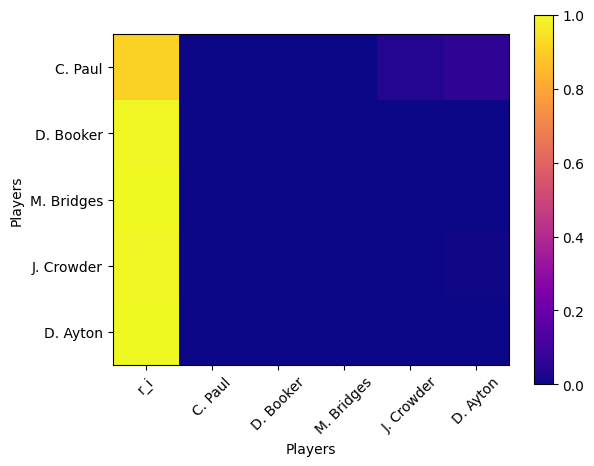

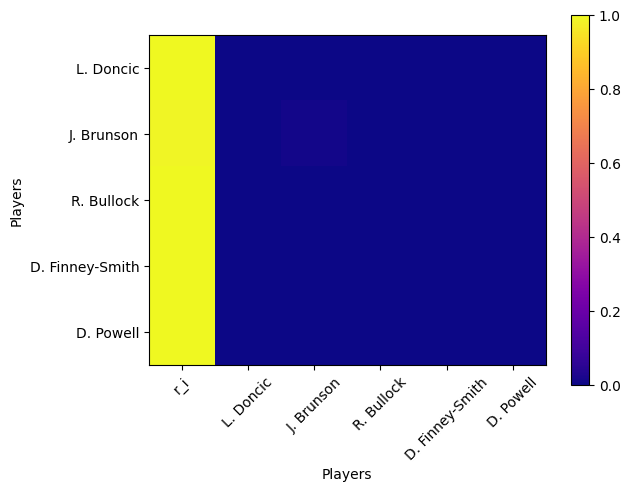

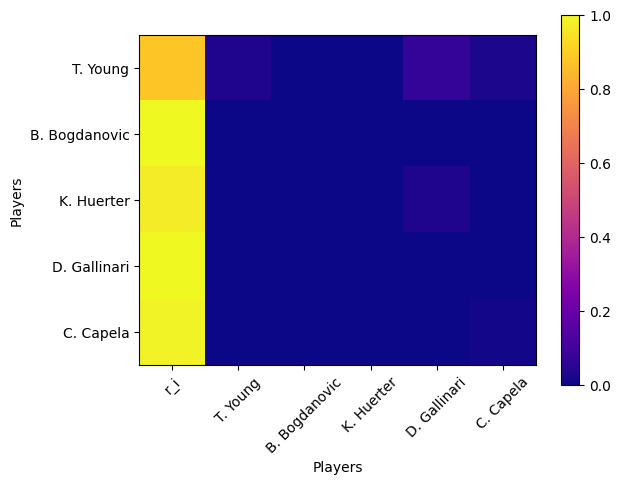

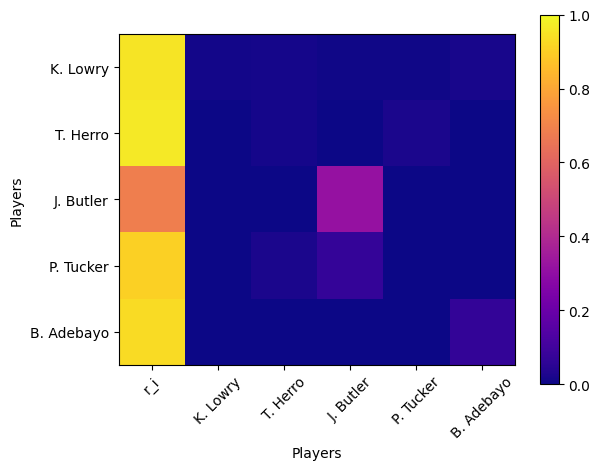

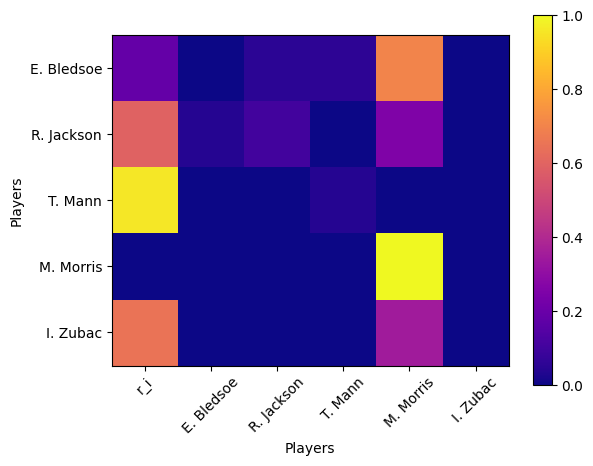

In [11]:
for team in teams:
    heatmap(profiles[team]['R'], team)